In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

cake = pd.read_csv('xnas-itch-20240822.mbo.CAKE.csv',parse_dates=['ts_recv', 'ts_event'])

In [62]:
import matplotlib.pyplot as plt

In [2]:
cake.columns

Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'price', 'size', 'channel_id', 'order_id', 'flags',
       'ts_in_delta', 'sequence', 'symbol'],
      dtype='object')

In [3]:
cake['action'].unique()

array(['R', 'A', 'C', 'T', 'F'], dtype=object)

In [4]:
cake_trades=pd.read_csv('xnas-itch-20240822.tbbo.CAKE.csv',parse_dates=['ts_recv', 'ts_event'])

In [5]:
cake_trades.head()

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
0,2024-08-22 13:28:00.059387613+00:00,2024-08-22 13:28:00.059217193+00:00,1,2,2639,T,N,0,38.76,60,0,170420,14286651,38.00,40.53,1,1000,1,1,CAKE
1,2024-08-22 13:28:00.059387613+00:00,2024-08-22 13:28:00.059217547+00:00,1,2,2639,T,N,0,38.76,40,128,170066,14286652,38.00,40.53,1,1000,1,1,CAKE
2,2024-08-22 13:30:00.918500023+00:00,2024-08-22 13:30:00.918318809+00:00,1,2,2639,T,N,0,38.66,3061,0,181214,17284072,38.64,39.36,95,200,1,1,CAKE
3,2024-08-22 13:30:05.131885094+00:00,2024-08-22 13:30:05.131717397+00:00,1,2,2639,T,N,0,38.78,34,130,167697,17937927,38.60,38.97,234,100,5,1,CAKE
4,2024-08-22 13:30:45.269318156+00:00,2024-08-22 13:30:45.269151493+00:00,1,2,2639,T,A,0,38.75,1,130,166663,21393675,38.75,38.97,1,100,1,1,CAKE


In [6]:
cake_trades.columns

Index(['ts_recv', 'ts_event', 'rtype', 'publisher_id', 'instrument_id',
       'action', 'side', 'depth', 'price', 'size', 'flags', 'ts_in_delta',
       'sequence', 'bid_px_00', 'ask_px_00', 'bid_sz_00', 'ask_sz_00',
       'bid_ct_00', 'ask_ct_00', 'symbol'],
      dtype='object')

In [67]:
#a.
cake_trades['dollar_vol']=cake_trades['price']*cake_trades['size']

In [8]:
dtv=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['dollar_vol'].sum()

<Axes: title={'center': 'Dollar trading volume'}, xlabel='ts_event'>

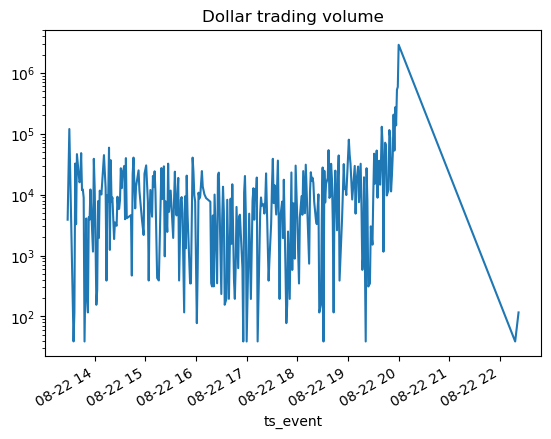

In [9]:
dtv.plot(title='Dollar trading volume',logy=True)

In [10]:
dtv.describe()

count    2.970000e+02
mean     2.912566e+04
std      1.748573e+05
min      3.867000e+01
25%      2.444520e+03
50%      8.180130e+03
75%      1.969411e+04
max      2.895873e+06
Name: dollar_vol, dtype: float64

In [69]:
#b.
trade_counts_min=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['sequence'].count()

<Axes: title={'center': 'No. of trades per min'}, xlabel='ts_event'>

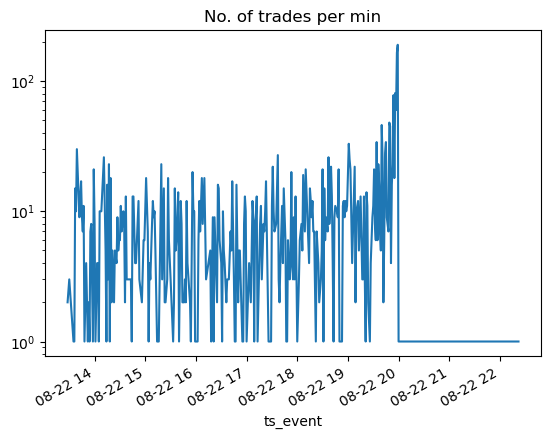

In [12]:
trade_counts_min.plot(title='No. of trades per min',logy=True)

In [13]:
trade_counts_min.describe()

count    297.000000
mean      10.218855
std       17.198638
min        1.000000
25%        3.000000
50%        7.000000
75%       12.000000
max      190.000000
Name: sequence, dtype: float64

In [14]:
order_counts_min=cake.groupby(cake['ts_event'].dt.floor('min'))['sequence'].count()

<Axes: xlabel='ts_event'>

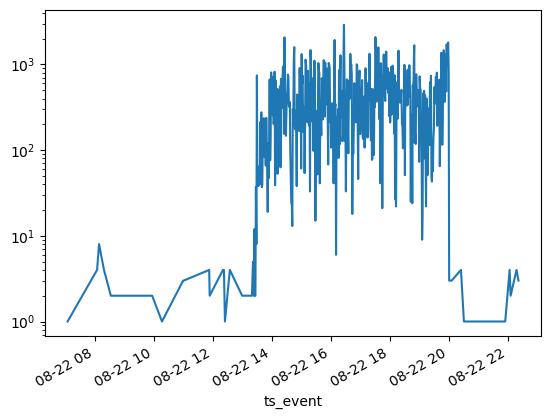

In [15]:
order_counts_min.plot(logy=True)

In [70]:
#c.
open=cake_trades.iloc[0]['price']
open

38.76

In [17]:
close=cake_trades.iloc[-1]['price']
close

38.74

In [18]:
high=max(cake_trades['price'])
high

39.09

In [19]:
low=min(cake_trades['price'])
low

38.265

In [71]:
#d.
cake_vwap=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min')).apply(lambda x: (x['price'] * x['size']).sum() / x['size'].sum())

<Axes: xlabel='ts_event'>

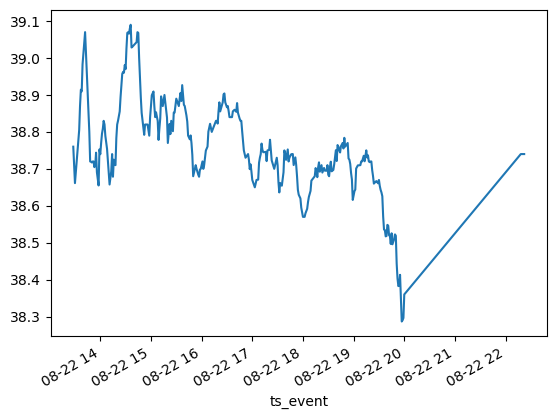

In [21]:
cake_vwap.plot()

In [22]:
cake_vwap.describe()

count    297.000000
mean      38.746883
std        0.136048
min       38.286692
25%       38.690647
50%       38.737566
75%       38.830000
max       39.090000
dtype: float64

In [72]:
#e.
cake_trades['spread']=cake_trades['ask_px_00']-cake_trades['bid_px_00']
cake_trades['avl']=0
for index,row in cake_trades.iterrows():
    if(row['side']=='A'):
        row['avl']=row['bid_sz_00']
    elif(row['side']=='B'):
        row['avl']=row['ask_sz_00']
    else:
        row['avl']=row['bid_sz_00']+row['ask_sz_00']

In [24]:
cake_spread_min=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['spread'].mean()

<Axes: xlabel='ts_event'>

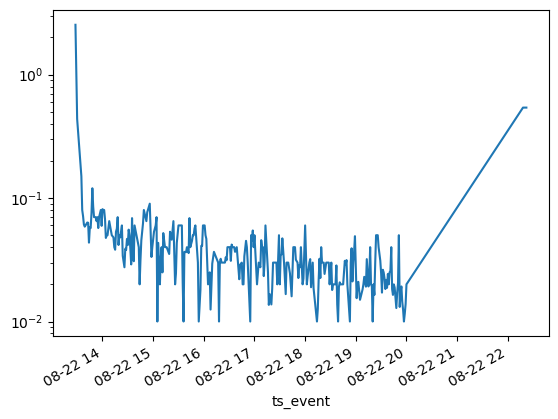

In [25]:
cake_spread_min.plot(logy=True)

In [26]:
cake_trades.loc[np.where(cake_trades['side']=='A')[0],'avl']=cake_trades.loc[np.where(cake_trades['side']=='A')[0],'bid_sz_00']
cake_trades.loc[np.where(cake_trades['side']=='B')[0],'avl']=cake_trades.loc[np.where(cake_trades['side']=='B')[0],'ask_sz_00']
cake_trades.loc[np.where(cake_trades['side']=='N')[0],'avl']=cake_trades.loc[np.where(cake_trades['side']=='N')[0],'bid_sz_00']+cake_trades.loc[np.where(cake_trades['side']=='N'),'ask_sz_00']

In [27]:
cake_depth_min=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['avl'].max()

<Axes: xlabel='ts_event'>

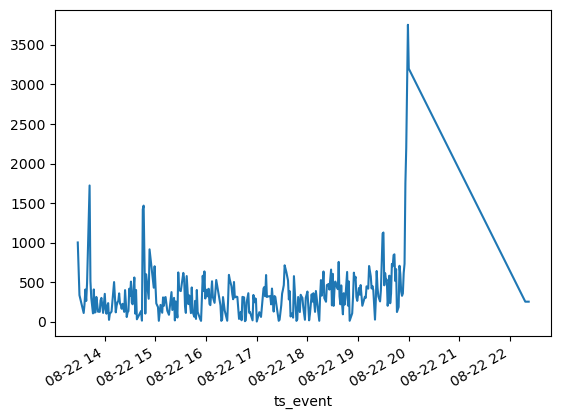

In [28]:
cake_depth_min.plot()

In [29]:
test_depth=2*cake_spread_min.mean()


In [73]:
#h.
cake_trades['mid']=(cake_trades['ask_px_00']+cake_trades['bid_px_00'])/2

In [35]:
cake_mid_1s=cake_trades.groupby(cake_trades['ts_event'].dt.floor('s'))['mid'].last()
cake_tsp_1s=cake_trades.groupby(cake_trades['ts_event'].dt.floor('s'))['price'].last()

,mid price,transaction price
count,749.000000,749.000000
mean,38.696509,38.696302
std,0.180203,0.178756
min,38.265000,38.270000
25%,38.630000,38.630000
50%,38.720000,38.715000
75%,38.810000,38.810000
max,39.265000,39.090000


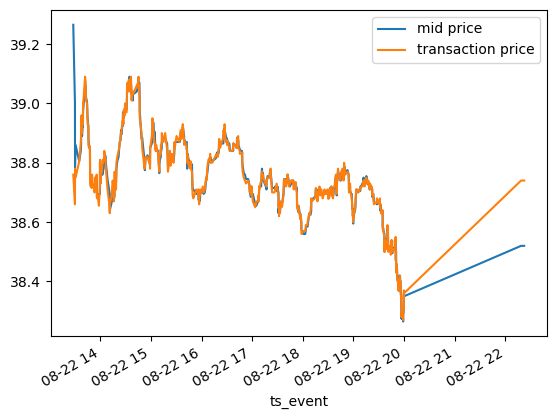

In [41]:
cake_1s=pd.DataFrame({'mid price':cake_mid_1s,'transaction price':cake_tsp_1s})
cake_1s.plot()
cake_1s.describe()

,mid price,transaction price
count,749.000000,749.000000
mean,38.696509,38.696302
std,0.180203,0.178756
min,38.265000,38.270000
25%,38.630000,38.630000
50%,38.720000,38.715000
75%,38.810000,38.810000
max,39.265000,39.090000


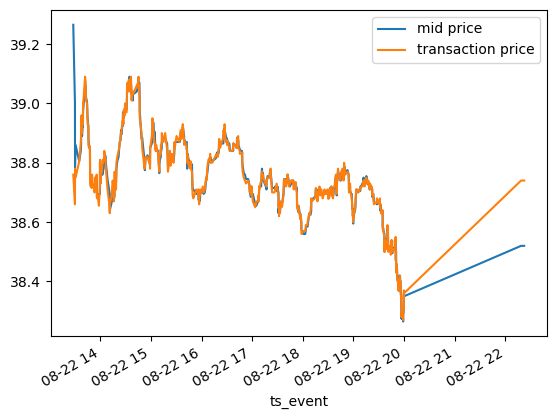

In [42]:
cake_mid_1m=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['mid'].last()
cake_tsp_1m=cake_trades.groupby(cake_trades['ts_event'].dt.floor('min'))['price'].last()
cake_1m=pd.DataFrame({'mid price':cake_mid_1s,'transaction price':cake_tsp_1s})
cake_1m.plot()
cake_1m.describe()

count    748.000000
mean      -0.000026
std        0.000574
min       -0.006772
25%       -0.000257
50%        0.000000
75%        0.000256
max        0.004423
Name: mid, dtype: float64

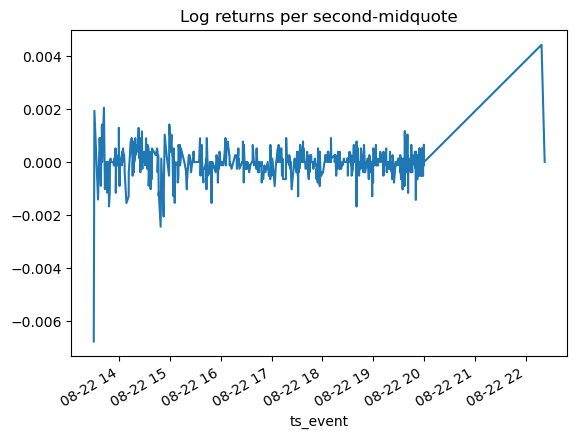

In [74]:
#i.
cake_logret_mpq_1s=np.log(cake_mid_1s).diff()
cake_logret_mpq_1s.plot(title="Log returns per second-midquote")
cake_logret_mpq_1s.describe()

count    296.000000
mean      -0.000065
std        0.001068
min       -0.010368
25%       -0.000389
50%        0.000000
75%        0.000386
max        0.004423
Name: mid, dtype: float64

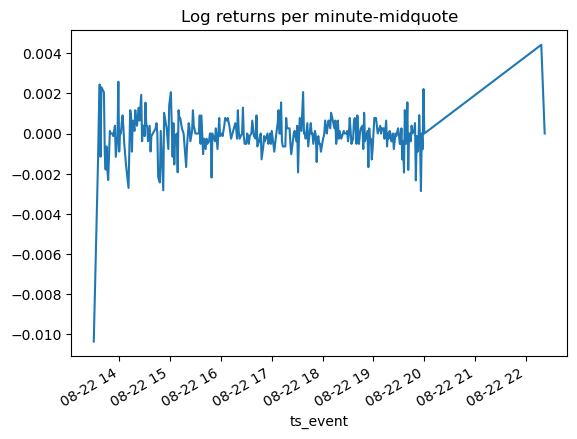

In [49]:
cake_logret_mpq_1m=np.log(cake_mid_1m).diff()
cake_logret_mpq_1m.plot(title="Log returns per minute-midquote")
cake_logret_mpq_1m.describe()

count    7.480000e+02
mean    -6.900121e-07
std      6.591143e-04
min     -2.583313e-03
25%     -2.587155e-04
50%      0.000000e+00
75%      2.585148e-04
max      9.857408e-03
Name: price, dtype: float64

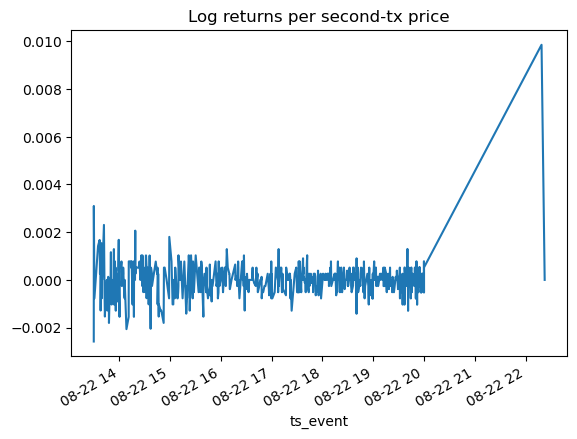

In [50]:
cake_logret_tsp_1s=np.log(cake_tsp_1s).diff()
cake_logret_tsp_1s.plot(title="Log returns per second-tx price")
cake_logret_tsp_1s.describe()

count    296.000000
mean      -0.000002
std        0.001116
min       -0.003094
25%       -0.000517
50%        0.000000
75%        0.000516
max        0.009857
Name: price, dtype: float64

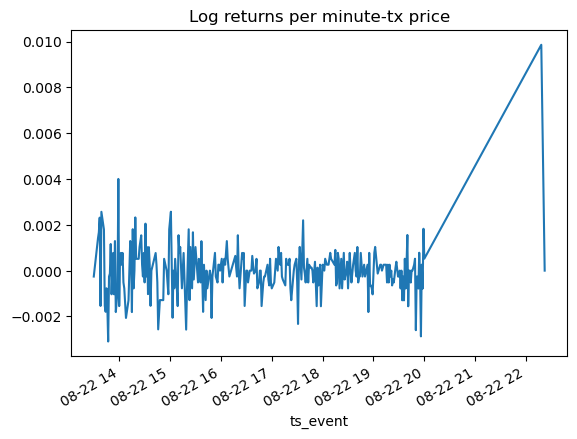

In [51]:
cake_logret_tsp_1m=np.log(cake_tsp_1m).diff()
cake_logret_tsp_1m.plot(title="Log returns per minute-tx price")
cake_logret_tsp_1m.describe()

In [75]:
#j.
#realized variance calculation
rv_mpq_1s=cake_logret_mpq_1s.var()
rv_mpq_1m=cake_logret_mpq_1m.var()
rv_ts_1s=cake_logret_tsp_1s.var()
rv_ts_1m=cake_logret_tsp_1m.var()

In [53]:
rv_mpq_1s

3.292514787501337e-07

In [54]:
rv_mpq_1m

1.1396518675140203e-06

In [55]:
rv_ts_1s

4.3443172611155505e-07

In [56]:
rv_ts_1m

1.2464683371154937e-06

[]

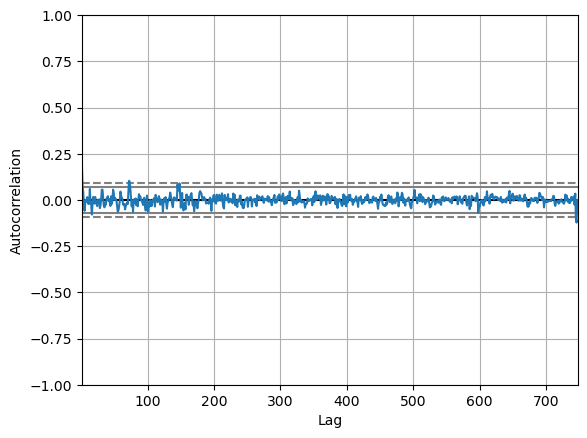

In [76]:
#k.
x=pd.plotting.autocorrelation_plot(cake_logret_mpq_1s[1:])
x.plot(title='Midquote 1s acf plot')


[]

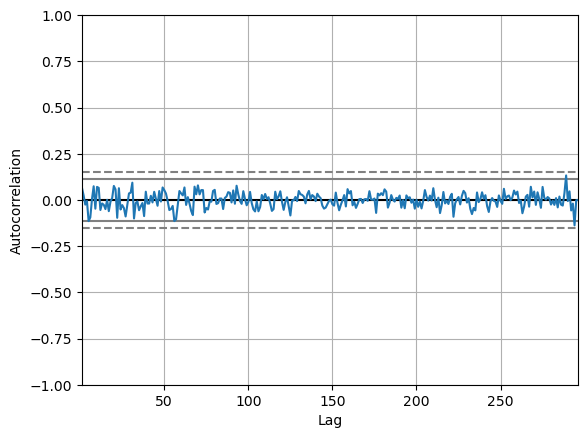

In [64]:
x=pd.plotting.autocorrelation_plot(cake_logret_mpq_1m[1:])
x.plot(title='Midquote 1m acf plot')


[]

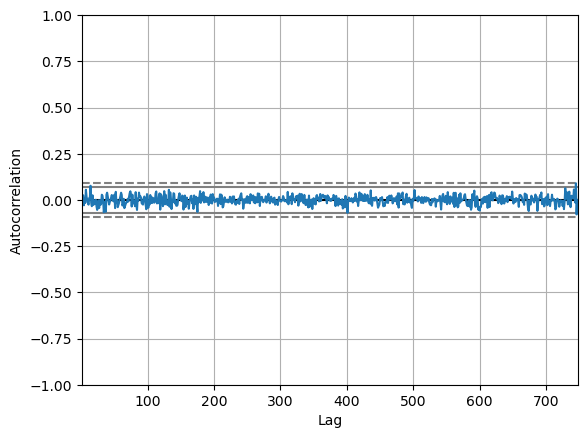

In [65]:
x=pd.plotting.autocorrelation_plot(cake_logret_tsp_1s[1:])
x.plot(title='Transaction price 1s acf plot')


[]

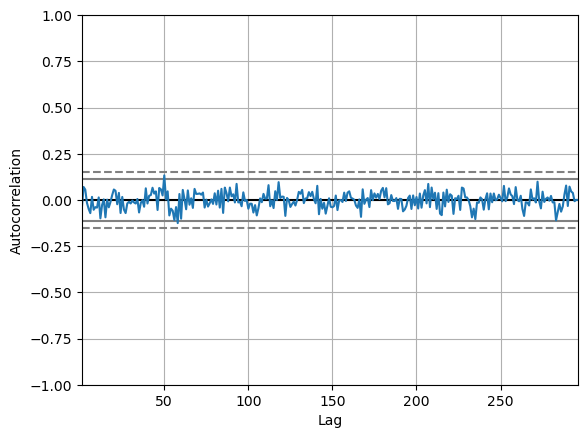

In [66]:
x=pd.plotting.autocorrelation_plot(cake_logret_tsp_1m[1:])
x.plot(title='Transaction price 1m acf plot')
